# What is a Graph?
A graph is a pictorial representation of a set of objects where some pairs of objects are connected by links. The interconnected objects are represented by points termed as vertices, and the links that connect the vertices are called edges.  

![](images/graph.jpg)
## Terminology
- **Vertex** or **Node** − Each element of the graph is represented as a vertex. In the above example, the labeled circle represents vertices. Thus, A to G are vertices. We can represent them using an array as shown in the following image. Here A can be identified by index 0. B can be identified using index 1 and so on.
- **Edge** − Edge represents a path between two vertices or a line between two vertices. In the following example, the lines from A to B, B to C, and so on represents edges. We can use a two-dimensional array to represent an array as shown above. Thus AB can be represented as 1 at row 0, column 1, BC as 1 at row 1, column 2 and so on, keeping other combinations as 0.
- **Adjacency** − Two node or vertices are adjacent if they are connected to each other through an edge. In the above example, B is adjacent to A, C is adjacent to B, and so on.
- **Path** − Path represents a sequence of edges between the two vertices. In the above example, ABCD represents a path from A to D.

## Undirected Graphs

A *graph* $G$ consists of a nonempty set, $V(G)$, called the *vertices* of $G$, and a set $E(G)$ called the *edges* of $G$.  

An element of $E(G)$ is an *undirected* edge or simply an "edge". An undirected edge has two vertices $u\neq v$ called its endpoints. Such an edge can be represented by the two element set $\{u, v\}$. The notation $\langle u—v \rangle$ denotes this edge.
Both $\langle u—v \rangle$ and $\langle v—u \rangle$ define the same undirected edge, whose endpoints are $u$ and $v$.

![](./images/graph_example.png)

For example, let $H$ be the graph pictured in Figure above. The vertices of $H$
correspond to the nine dots, that is, $V(H) = \{a,b,c,d,e,f,g,h,i\}$

The edges correspond to the eight lines, that is,

$E(H) = \big\{\langle a—b \rangle,\langle a—c \rangle,\langle b—d \rangle,\langle c—d \rangle,\langle c—e \rangle,\langle e—f \rangle,\langle e—g \rangle,\langle h—i \rangle\big\} $


## Directed Graphs

A *directed graph* -or *digraph*- $G$ consists of a nonempty set $V(G)$, called the vertices of $G$, and a set $E(G)$, called the edges of $G$. An element of $E(G)$ is called a *directed edge*. A directed edge is also called an "arrow" or simply an "edge". A directed edge starts at some vertex $u$ called the *tail* of the edge, and ends at some vertex $v$ called the *head* of the edge.

![](./images/digraph_example.png)


### Vertex Degrees

The *in-degree* of a vertex in a digraph is the number of arrows coming into it, and similarly its *out-degree* is the number of arrows out of it.

##### References:
The definitions above and the illustrations are taken from the book:
*Mathematics for Computer Science*, Eric Lehman, F. Tom Leighton, Albert R. Meyer
https://courses.csail.mit.edu/6.042/spring17/mcs.pdf

## More detailed explanation

[A python guide to graph theory](https://runestone.academy/runestone/books/published/pythonds/Graphs/toctree.html)

# Name Generator

Lets generate a directed graph -a social network-, which expresses endorsements between various people similar as in *LinkedIn*. The nodes of our digraph will be persons and the edges will represent endorsments. 


For the nodes, we will generate a set of "random" people. That is, we generate names as given in the USA randomly. A list of US American names can be received here:
http://www.census.gov/topics/population/genealogy/data/1990_census/1990_census_namefiles.html


In the following we download the files and generate three lists, one for female names, one for male names, and one for surnames.

In [1]:
import webget
import random

surnames_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.all.last'
female_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.female.first'
male_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.male.first'

webget.download(surnames_txt, to='./last_names.txt')
webget.download(female_names_txt, to='./female_names.txt')
webget.download(male_names_txt, to='./male_names.txt') 

'./male_names.txt'

In [2]:
%%bash
ls -ltr *names.txt

-rw-rw-r-- 1 tha tha 3107965 Mar 13 16:48 last_names.txt
-rw-rw-r-- 1 tha tha  149625 Mar 13 16:48 female_names.txt
-rw-rw-r-- 1 tha tha   42665 Mar 13 16:48 male_names.txt


In [3]:
def get_names_from(file):
    with open(file, 'r') as fp:
        return [x.split()[0] for x in fp]

In [4]:
names = get_names_from('./last_names.txt')
female_names = get_names_from('./female_names.txt')
male_names = get_names_from('./male_names.txt')

print('family names:{}, female names:{}, male names:{}'.format(len(names), len(female_names), len(male_names)))

family names:88799, female names:4275, male names:1219


We decide to let names be a two-element tuple consisting of a name and a surname.

In [5]:
import random 
def random_combination(list_a, list_b):
    return random.choice(list_a) + ' ' + random.choice(list_b)
random_combination(female_names,names)

'ZORAIDA TOPOLANSKY'

In [6]:
def generate_random_names(amount=1, gender='female'):  
    random_names = []
    for i in range(amount):
        if gender == 'female':
            name = random_combination(female_names, names)
        elif gender == 'male':
            name = random_combination(male_names, names)
        else:
            name = random_combination(male_names + female_names, names)
        random_names.append(name)
    return random_names
    
generate_random_names(amount=10, gender='random')

['MAGALI HATCHEL',
 'VIVIENNE MATRO',
 'BRYNN CABANA',
 'BOBBI GALIMBERTI',
 'SHEA FRERE',
 'WILLETTE HERTLEIN',
 'STEPHEN FELD',
 'CORA MULICH',
 'ALANA LINEN',
 'CHASSIDY AKE']

# Generating Nodes

Now, that we have our name generator in place we are good to start generating our *endorsment graph*.

For our example graph, we decide that it contains 100 persons, i.e., 100 nodes. Half of the nodes represents women and the other half represents men.

In [7]:
total_no_nodes = 100
no_nodes_per_gender = total_no_nodes // 2

In [8]:
female_names_list = generate_random_names(amount=no_nodes_per_gender, gender='female')
male_names_list = generate_random_names(amount=no_nodes_per_gender, gender='male')

In [9]:
all_names_list = female_names_list + male_names_list
person_list = all_names_list
#person_list[-20:-1]

In [10]:
print(len(all_names_list))
print(all_names_list[:20])

100
['KORTNEY BRISKY', 'DEANDRA NOREM', 'ANGELA TSEMETZIS', 'SEPTEMBER HAMNON', 'ALETHA BREITBART', 'STORMY KUCAN', 'LAWANDA PULLANO', 'VIRGINA BREDERNITZ', 'EILENE GENSON', 'MILDRED JARRELLS', 'TARI PERINE', 'PRICILLA PENHALL', 'LUCILLE SAMIENTO', 'LETTY JOWERS', 'CANDI KNIGHTON', 'HOLLEY GORKA', 'ANYA SIVIK', 'IVA RILLING', 'ANIKA PRIEBE', 'ARIE CAVICCHI']


# Generating Edges

Randomly connected (=endorsed).
Also, it is not possible for a person to connect to herself.

In [11]:
from tqdm import tqdm
from random import randint
from numpy.random import choice

In [12]:
# Sample probability
choice?

### Creating random numbers 
We will create a random number between 0 and 100 (both inclusive) with controlled probability. Eg. the chance of getting a number between 5 to 10 is much higher than a number from 51 to 100 or getting 0

In [13]:
RELATION_CLASSES = {
        0: (0, 0),
        1: (1, 4),
        2: (5, 10),
        3: (11, 20),
        4: (21, 50),
        5: (51, 100)
    }
PROBABILITIES = [0.05, 0.36, 0.45, 0.1, 0.035, 0.005]

In [14]:
def get_no_endorsements():
    no_relation_class = choice(list(RELATION_CLASSES.keys()), 
                               p=PROBABILITIES)
    no_endorsments = randint(RELATION_CLASSES[no_relation_class][0], 
                             RELATION_CLASSES[no_relation_class][1])
    return no_endorsments

a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
print(list(zip(a, b)))
get_no_endorsements()

[(1, 5), (2, 6), (3, 7), (4, 8)]


2

In [15]:
def create_endorsements(node_list):
    """Creates a list of graph edges
    like [(1,10), (50,4), (99,20000), ...]"""
    endorsements = []
    idx_list = range(len(node_list))

    for idx, name_pair in tqdm(enumerate(node_list)):
        # get how many people this person (name_pair) endorses
        no_endorsments = get_no_endorsements()
        if no_endorsments > 0:
            # get a list of potential endorsements
            potential_endorsement_idxs = random.sample(idx_list, no_endorsments)
            if idx in potential_endorsement_idxs:
                # Removing myself in case I am in the list
                # cannot endorse myself
                idx_me_in_endorsements = potential_endorsement_idxs.index(idx)
                del potential_endorsement_idxs[idx_me_in_endorsements]
    
            endorsements += list(zip([idx for _ in range(len(potential_endorsement_idxs))], 
                                     potential_endorsement_idxs))
    return endorsements

endorsements = create_endorsements(person_list)

100it [00:00, 18316.54it/s]


In [16]:
print(endorsements[:30])
print(person_list)

[(0, 6), (0, 52), (0, 65), (0, 77), (0, 23), (0, 42), (0, 97), (0, 54), (0, 82), (0, 99), (1, 53), (1, 97), (2, 49), (2, 44), (2, 27), (2, 4), (2, 79), (3, 5), (3, 69), (3, 67), (3, 40), (4, 2), (4, 93), (4, 66), (4, 72), (4, 48), (4, 46), (5, 54), (5, 38), (5, 51)]
['KORTNEY BRISKY', 'DEANDRA NOREM', 'ANGELA TSEMETZIS', 'SEPTEMBER HAMNON', 'ALETHA BREITBART', 'STORMY KUCAN', 'LAWANDA PULLANO', 'VIRGINA BREDERNITZ', 'EILENE GENSON', 'MILDRED JARRELLS', 'TARI PERINE', 'PRICILLA PENHALL', 'LUCILLE SAMIENTO', 'LETTY JOWERS', 'CANDI KNIGHTON', 'HOLLEY GORKA', 'ANYA SIVIK', 'IVA RILLING', 'ANIKA PRIEBE', 'ARIE CAVICCHI', 'DAWNE HAULK', 'JOVAN GIORGINI', 'GARNET CIPOLLONE', 'ZANDRA TIMPE', 'GOLDIE SALVATORE', 'RICKIE ECKSTROM', 'ELEONORE JIRJIS', 'WINTER ESTRELA', 'ANNALISA MAN', 'ANNICE LETARTE', 'CHARIS SCHOOL', 'HORTENSIA DURFEY', 'KRISTINA FUTRAL', 'CRISTINA WHEADON', 'ASIA BELK', 'TIFFANIE MEDLAR', 'TRISTA MANDEL', 'RAFAELA BROGDEN', 'TANDRA KILIAN', 'BARRIE ORNELAS', 'THEO SITZ', 'CASS

In [17]:
#%%bash
#conda install -y networkx
#conda install -c anaconda pygraphviz 

In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot

def create_graph():
    graph = nx.DiGraph()
    graph.clear()

    # add node by node, needed to add attributes...
    print(len(all_names_list))

    for idx, name_pair in enumerate(all_names_list):
        graph.add_node(idx, name=' '.join(name_pair))
    
    # graph.add_nodes_from(all_names_list)
    graph.add_edges_from(endorsements)

    return graph

In [20]:
import pygraphviz

100


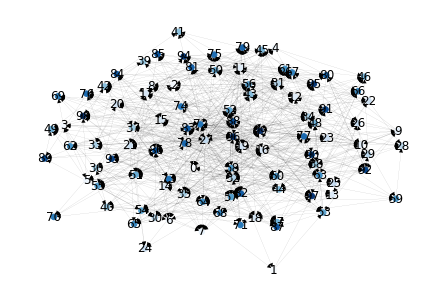

In [21]:
def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))
    
graph = create_graph()
draw_graph(graph)

#nx.write_gml(graph, './social_network.gml')

In [28]:
print(graph.nodes[10]['name'])
print(graph.out_degree(10))
print(graph.out_edges(10))
#print(graph.nodes[graph.out_edges(10)])
print(graph.in_edges(10))

T A R I   P E R I N E
6
[(10, 68), (10, 52), (10, 13), (10, 72), (10, 43), (10, 19)]
[(9, 10), (16, 10), (27, 10), (43, 10), (48, 10), (60, 10), (72, 10), (95, 10)]


In [29]:
# print(graph.node)
print(graph.number_of_nodes())

100


## Who is the most interesting person in our network?

Likely, you are tempted to find the person in the graph, which has the highest in-degree. For example with code similar to the following.

In [ ]:
import numpy as np

in_deg_vec = np.array([graph.in_degree(n) for n in graph.nodes()])
max_ind_deg = in_deg_vec.max()

In [ ]:
print(np.argmax(in_deg_vec))
print(graph.node[np.argmax(in_deg_vec)]['name'])


However, there is an issue with this solution. To make yourself the most interesting person you would just have to create a lot of profiles of people endorsing you. This issue can be overcome by applying the ***PageRank*** algorithm.

In [ ]:
d = 0.85
n = graph.number_of_nodes()
sub_term = (1 - d) / n

def page_rank(p):
    
    page_rank = sub_term  + (d * pass)
    return page_rank

## Working with a twitter dataset

https://snap.stanford.edu/data/egonets-Twitter.html

In [31]:
!wget https://snap.stanford.edu/data/twitter_combined.txt.gz

--2020-03-14 22:30:22--  https://snap.stanford.edu/data/twitter_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10621918 (10M) [application/x-gzip]
Saving to: ‘twitter_combined.txt.gz’

twitter_combined.tx 100%[===================>]  10.13M   848KB/s    in 18s     

2020-03-14 22:30:41 (569 KB/s) - ‘twitter_combined.txt.gz’ saved [10621918/10621918]



In [32]:
!gunzip twitter_combined.txt.gz

In [33]:
import networkx as nx

In [34]:
g = nx.read_edgelist('twitter_combined.txt')

## Networkx documentation for undirected graphs
https://networkx.github.io/documentation/stable/reference/classes/graph.html

In [49]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 81306
Number of edges: 1342310
Average degree:  33.0187


In [36]:
'214328887' in g

True

In [48]:
# Atlas view is a mapping of mappings (for key=node, value=edge weight)
g['214328887']

AtlasView({'34428380': {}, '56860418': {}, '463952369': {}, '157829215': {}, '158419434': {}, '14925700': {}, '358775055': {}, '380580781': {}, '112939321': {}, '155661154': {}, '123371682': {}, '86221475': {}, '265077741': {}, '307458983': {}, '252770012': {}, '254839786': {}, '279787626': {}, '151338729': {}, '74107696': {}, '195475105': {}, '153226312': {}, '19493072': {}, '145845459': {}, '274153775': {}, '103598216': {}, '8088112': {}, '221036078': {}, '149538028': {}, '26929220': {}, '6581292': {}, '83943787': {}, '37699718': {}, '204140367': {}, '204317520': {}, '107830991': {}, '276706356': {}, '400689940': {}, '222261763': {}, '17868918': {}, '29911100': {}, '46209291': {}, '28465635': {}, '406628822': {}, '439788025': {}, '21548772': {}, '229425177': {}, '236184723': {}, '18951737': {}, '187773078': {}, '276577539': {}, '69592091': {}, '430268163': {}, '529007327': {}, '88323281': {}, '134940306': {}, '250340951': {}, '270449528': {}, '276308596': {}, '259842341': {}, '124528

In [39]:
len(g)

81306

In [45]:
len(list(g.neighbors('214328887'))) # same as g['21432887']

284

In [43]:
for neighbor in g.neighbors('214328887'):
    print(neighbor)

34428380
56860418
463952369
157829215
158419434
14925700
358775055
380580781
112939321
155661154
123371682
86221475
265077741
307458983
252770012
254839786
279787626
151338729
74107696
195475105
153226312
19493072
145845459
274153775
103598216
8088112
221036078
149538028
26929220
6581292
83943787
37699718
204140367
204317520
107830991
276706356
400689940
222261763
17868918
29911100
46209291
28465635
406628822
439788025
21548772
229425177
236184723
18951737
187773078
276577539
69592091
430268163
529007327
88323281
134940306
250340951
270449528
276308596
259842341
124528830
375317198
196327549
297801196
153460275
72818790
67864340
314316607
116036694
160237722
280935165
19358562
117674417
257236842
394263193
17116707
292598082
83417972
238201669
226629405
43003845
451250774
35415466
22462180
57490887
225444667
131613362
27633075
121533789
200559228
220368467
18996905
172883064
40981798
206923844
133055665
100581193
248883350
31331740
273149543
285312927
229039814
175553601
308723182
5443

## Class exercise
Which node in the twitter data has the most connections?

## Self study
Below code is from [geeksforgeeks](https://www.geeksforgeeks.org/find-the-minimum-number-of-moves-to-reach-end-of-the-array/).  
It shows how to create a graph from an array of integers where: 
1. Each element in the array is neighbor with elements on previous and next index
2. Each element in the array is neighbor with any other element with the same value  
**Illustrated with array:  [1, 2, 3, 4, 1, 5] like below**
![](images/graph_exercise.png)

And to find the ***shortest possible*** path through the graph

In [42]:
# Find the shortest possible road through an array of 0-9. A graph where each cell is connected to prev and next and to any same value
# source: https://www.geeksforgeeks.org/find-the-minimum-number-of-moves-to-reach-end-of-the-array/
from collections import deque 
N = 100005

# the graph is an array of arrays where inner array represent nodes and values in inner represent edges
gr = [[] for i in range(N)] 
  
# Function to add edge 
def add_edge(u, v): 
    gr[u].append(v) 
    gr[v].append(u)
    
# function to return the minimum path 
# from 0th node to the (n - 1)th node 
def dijkstra(n): 
      
    # To check whether an edge is visited 
    # or not and to keep distance of vertex 
    # from 0th index 
    vis = [0 for i in range(n)] 
    dist = [10**9 for i in range(n)] 
  
    # Make 0th index visited and  
    # distance is zero 
    vis[0] = 1
    dist[0] = 0
  
    # Take a queue and  
    # append first element 
    q = deque() 
    q.append(0) 
  
    # Continue this until   
    # all vertices are visited 
    while (len(q) > 0): 
        x = q.popleft() 
  
        # Remove the first element 
        for i in gr[x]: 
  
            # Check if a vertex is  
            # already visited or not 
            if (vis[i] == 1): 
                continue
  
            # Make vertex visited 
            vis[i] = 1
  
            # Store the number of moves  
            # to reach element 
            dist[i] = dist[x] + 1
  
            # Push the current vertex 
            # into the queue 
            q.append(i) 
  
    # Return the minimum number of 
    # moves to reach (n - 1)th index 
    return dist[n - 1] 
  
# Function to return the minimum number of moves 
# required to reach the end of the array 
def Min_Moves(a, n): 
  
    # To store the positions of each element 
    fre = [[] for i in range(10)] 
    for i in range(n): 
        if (i != n - 1): 
            add_edge(i, i + 1) 
  
        fre[a[i]].append(i) 
  
    # Add edge between same elements 
    for i in range(10): 
        for j in range(len(fre[i])): 
            for k in range(j + 1,len(fre[i])): 
                if (fre[i][j] + 1 != fre[i][k] and 
                    fre[i][j] - 1 != fre[i][k]): 
                    add_edge(fre[i][j], fre[i][k]) 
  
    # Return the required  
    # minimum number of moves 
    return dijkstra(n) 
  
# Driver code 
a = [1, 2, 3, 4, 1, 5] 
n = len(a) 

print(Min_Moves(a, n)) 
  
# This code is contributed by Mohit Kumar 


2


# PageRank Algorithm

**PageRank** was one of the original ideas that set Google's search apart from other Web search engines when it was introduced in 1997.

PageRank was invented to solve the problem of term-frequency (TF) tyranny: if we are searching for `IBM`, how do we make sure that the *first* result is IBM's website, and not a random page that mentioned `IBM` more frequently?

The idea is that ibm.com has many in-links (links to the page) so it should be ranked higher.
Each in-link is a vote for the quality of the linked-to page. But if we only count in-links it would be possible for a web spammer to create a network of pages and have them all point to his page, increasing the score of his page. 

Therefore the PageRank algorithm is designed to weight links from high-quality sites more heavily. A high-quality site is one that is linked to by other high-quality sites.

##### References:
The above description is from *Artificial Intelligence: A Modern Approach Third Edition* by Stuart J. Russell and Peter Norvig.

## PageRank implementation


$PR(p) = \frac{1-d}{N} + d \sum_{i}^{} \frac{PR(in_{i})}{C(in_{i})}$

Where $PR(p)$ is the page rank of page $p$, $N$ is the total number of pages, $in_i$ are the pages that link *to* page $p$ and $C(in_i)$ is the count of the total number of out-links on page $in_i$. The constant $d$ is a dampening factor to reduce the value for each link.

This is an iterative algorithm, where we start with all pages having rank = 1.

In [ ]:
import numpy as np

GLOBAL_PR = np.ones(graph.number_of_nodes())
d = 0.8

def compute_page_rank(graph, no_it=100):
    """Computes the page rank of the given graph
    
    Arguments:
      graph: A networkx graph
      no_it: A number of iterations to run the algorithm
    """
    for _ in range(no_it):
        for node in graph.nodes:
            edges_in = [t[0] for t in graph.in_edges(node)]
            sum_in = 0
            for in_node in edges_in:
                c = len(graph.out_edges(in_node))
                pr = GLOBAL_PR[in_node]
                sum_in += pr / c
            sum_in *= d
            new_rank = sum_in + ((1 - d) / len(GLOBAL_PR))
            GLOBAL_PR[node] = new_rank
        
compute_page_rank(graph)

In [ ]:
compute_page_rank(graph, no_it=100)
print('The highest PR is {}'.format(GLOBAL_PR[np.argmax(GLOBAL_PR)]))
print('The node with the highest PR is {}'.format(np.argmax(GLOBAL_PR)))
print('The person with the highest Page Rank is {}'.format(graph.node[np.argmax(GLOBAL_PR)]['name']))
print(GLOBAL_PR)

In [ ]:
import numpy as np


GLOBAL_PR = np.ones(graph.number_of_nodes())


def page_rank(node):
    n = graph.number_of_nodes()
    damping = 0.85

    pr_in = np.array([GLOBAL_PR[remote] for remote, _ in graph.in_edges(node)])
    c = np.array([graph.out_degree(remote) for remote, _ in graph.in_edges(node)])
    pr_p = ((1 - damping) / n) + (damping * np.sum(pr_in / c))

    return pr_p
        

def compute_page_rank_step(graph):
    return np.array([page_rank(n) for n in graph.nodes()])
    
    
def compute_page_rank(graph, no_it=100):
    global GLOBAL_PR
    if no_it == 'converge':
        converged = False
        it_count = 0
        while not converged:
            new_pr = compute_page_rank_step(graph)
            converged = np.array_equal(GLOBAL_PR, new_pr)
            GLOBAL_PR = new_pr 
            it_count += 1
            
        print('It took me {} iterations to converge'.format(it_count))
    else:
        for idx in range(no_it):
            GLOBAL_PR = compute_page_rank_step(graph)
            
compute_page_rank(graph, no_it='converge')
print('The highest PR is {}'.format(GLOBAL_PR[np.argmax(GLOBAL_PR)]))
print('The node with the highest PR is {}'.format(np.argmax(GLOBAL_PR)))
print('The person with the highest PR is {}'.format(graph.node[np.argmax(GLOBAL_PR)]['name']))
print(GLOBAL_PR)

In [ ]:
print(graph.node[27]['name'])